In [1]:
from platform import python_version 
python_version()

'3.7.12'

In [6]:
import matplotlib.pyplot as plt
import netCDF4 as nc
from netCDF4 import Dataset
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs

In [7]:
dataset = '/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc'
data = xr.open_dataset(dataset)

In [8]:
for var in ds.variables.values(): # print all variables 
    print(var)

<xarray.Variable (y: 511, x: 722)>
[368942 values with dtype=float32]
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
<xarray.Variable (y: 511, x: 722)>
[368942 values with dtype=float32]
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
<xarray.Variable (time_counter: 1020)>
array(['2015-01-16T12:00:00.000000000', '2015-02-15T00:00:00.000000000',
       '2015-03-16T12:00:00.000000000', ..., '2099-10-16T12:00:00.000000000',
       '2099-11-16T00:00:00.000000000', '2099-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      Time axis
    time_origin:    2015-01-01 00:00:00
    bounds:         time_centered_bounds
<xarray.Variable (time_counter: 1020, axis_nbounds: 2)>
array([['2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000'],
       ['2015-02-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000'],
   

In [ ]:
ds.variables.values() # print all variables

In [ ]:
print(ds.variables.keys()) 

In [ ]:
ds.variables['time_counter'] # print single variable

In [ ]:
ds.nav_lat # inspect variable

In [ ]:
ds['nav_lon'].min()

# or - ds.nav_lon.min() -

In [ ]:
ds_date = data.sel(time_counter='2015-01-16') # select one timestep

In [ ]:
ds['nav_lon'] = ds['nav_lon'].values.flatten()
ds['nav_lat'] = ds['nav_lat'].values.flatten()

ds['nav_lon'] = ds['nav_lon'].round(decimals = 0)
ds['nav_lat'] = ds['nav_lat'].round(decimals = 0)

In [ ]:
df = data.to_dataframe() # turn into Pandas dataframe

In [ ]:
df.head() # first lines of the dataframe

In [ ]:
df.describe() # describe the data 

In [ ]:
df.tail() # tail of the dataframe

In [ ]:
df.index

In [ ]:
# calculate the month length 

month_length = data.time_counter.dt.days_in_month 
month_length 

# calculate the weights by grouping by season

weights = (
    month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum()
)
weights

# test that the sum of the weights for each season is 1.0

np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))

In [ ]:
df.to_dataset() # turn into array

In [ ]:
# calculate the mean CO2 flux at each latitude

lat_bins = np.arange(0, 91, 2) # define two-degree wide latitude bins

lat_center = np.arange(1, 90, 2) # define a label for each bin corresponding to the central latitude

co2flux_mean = data.co2flux_cpl.groupby_bins("nav_lat", lat_bins, labels=lat_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

co2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

In [ ]:
# calculate the mean CO2 flux at each longitude

lon_bins = np.arange(-181, 181, 2) # define two-degree wide latitude bins

lon_center = np.arange(-180, 180, 2) # define a label for each bin corresponding to the central latitude

co2flux_mean = data.co2flux_cpl.groupby_bins("nav_lon", lon_bins, labels=lon_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

co2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

### % Amplitude Change Over Time with and without OAE

In [1]:
fco2_amplitude_baseline_pct = fco2_amplitude_baseline.to_dataframe()
fco2_amplitude_oae_pct = fco2_amplitude_oae.to_dataframe()

NameError: name 'fco2_amplitude_baseline' is not defined

In [425]:
fco2_amplitude_baseline_pct = fco2_amplitude_baseline_pct.pct_change()
fco2_amplitude_oae_pct = fco2_amplitude_oae_pct.pct_change()

In [426]:
fco2_amplitude_baseline_pct = fco2_amplitude_baseline_pct.to_xarray()
fco2_amplitude_oae_pct = fco2_amplitude_oae_pct.to_xarray()

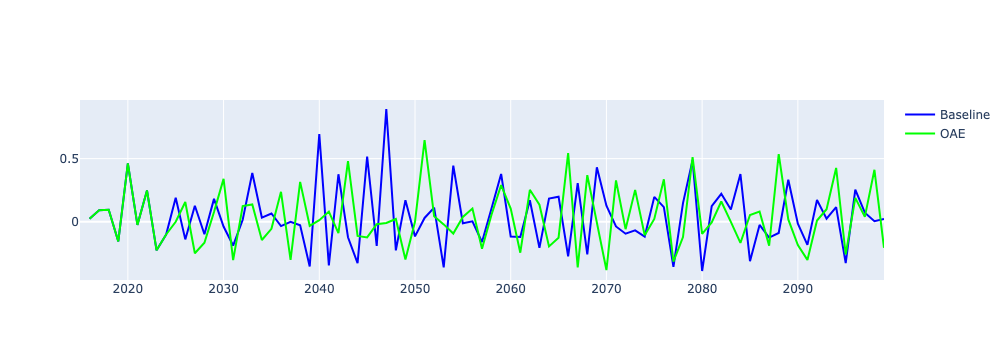

In [427]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=fco2_amplitude_baseline_pct.year, y=fco2_amplitude_baseline_pct['fco2'],
                    mode='lines', line_color='#0000FF',
                    name='Baseline'))
fig.add_trace(go.Scatter(x=fco2_amplitude_oae_pct.year, y=fco2_amplitude_oae_pct['fco2'],
                    mode='lines', line_color='#00FF00',
                    name='OAE'))
fig.show()

In [ ]:
sliced_data = ds.where((-25 < ds.nav_lon) & (ds.nav_lon < 20) & (35 < ds.nav_lat) & (ds.nav_lat < 70), drop=True)

# https://stackoverflow.com/questions/41818927/how-to-subset-data-using-multidimensional-coordinates-using-python-xarr